# Electric Vehicle Sales By State In India

## Problem Statement: 
**This project aims to analyze and predict the sales of Electric Vehicles (EV) by state in
India using machine learning.**

## DataScience LIfeCycle has following components:
   1. Data source:Here we read the data and paas to next component
   2. Data Ingestion: Here we do train and test split and paas  to next component
   3. Data Tranformation: Here we do EDA and Feature Engineering and paas to next component
   4. ModelTrainer:Multiple models will get applied
   5. ModelEvaluation: Each model will get evaluated and we will select model with best accuracy
   6. Model Deployment:Here we use pipelines 

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

### Data source:Here we read the data and paas to next component
**Our Data source is Electric_Vehicle.csv**

In [2]:
Electric_Vehicle_Data=pd.read_csv('Electric_Vehicle.csv')
Electric_Vehicle_Data

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


###  Data Transformation:Exploratory Data Analysis (EDA) & Feature Engineering

#### Exploratory Data Analysis (EDA) 

#### Top 5 rows

In [3]:
Electric_Vehicle_Data.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


#### Shape of Data

In [4]:
Electric_Vehicle_Data.shape

(96845, 8)

### Data Checks

#### **Check missing Values**

In [5]:
Electric_Vehicle_Data.isna().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

**No Missing Value present**

#### Check Duplicates

In [6]:
Electric_Vehicle_Data.duplicated().sum()

0

**No Duplicates present**

#### Stastics about Data**

### Check Data Types

In [7]:
Electric_Vehicle_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


**we have float and object datatypes in our data set**

#### Unique number of values in each column

In [8]:
Electric_Vehicle_Data.nunique()

Year                   11
Month_Name             12
Date                  121
State                  34
Vehicle_Class          73
Vehicle_Category        5
Vehicle_Type           12
EV_Sales_Quantity    1447
dtype: int64

In [9]:
print(len(Electric_Vehicle_Data['Vehicle_Class'].unique()))

73


In [10]:
Electric_Vehicle_Data.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


- Year can not be in float so converting it to integer
- To maintain consistency converting EV_Sales_Quantity as well  to Integer

In [11]:
Electric_Vehicle_Data['Month_Name']

0        jan
1        jan
2        jan
3        jan
4        jan
        ... 
96840    dec
96841    dec
96842    dec
96843    dec
96844    dec
Name: Month_Name, Length: 96845, dtype: object

In [12]:
print(Electric_Vehicle_Data['Year'].dtype)
print(Electric_Vehicle_Data['EV_Sales_Quantity'].dtype)
print(Electric_Vehicle_Data['Month_Name'].dtype)

float64
float64
object


In [13]:
Electric_Vehicle_Data.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [14]:
Electric_Vehicle_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


**Now we have date types as integer and Object**

In [15]:
Dependant_features=['Year','Month_Name','Date','State','Vehicle_Class','Vehicle_Category','Vehicle_Type']
Target_Feature=['EV_Sales_Quantity']
print('Dependant_features:',Dependant_features)
print('Target_Feature:',Target_Feature)

Dependant_features: ['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
Target_Feature: ['EV_Sales_Quantity']


In [16]:
Electric_Vehicle_Data['Day']=[val.split('/')[0] for val in Electric_Vehicle_Data['Date']]

In [17]:
Electric_Vehicle_Data['Day']

0         1
1         1
2         1
3         1
4         1
         ..
96840    12
96841    12
96842    12
96843    12
96844    12
Name: Day, Length: 96845, dtype: object

In [18]:
Electric_Vehicle_Data.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


**As we have split the Date in Day,month_name,Year ,we dont need Date column,
 we are dropping it**

In [19]:
Electric_Vehicle_Data_modified=Electric_Vehicle_Data.drop(['Date'],axis=1,inplace=True)

In [20]:
Electric_Vehicle_Data.head()

,Year,Month_Name,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Day
0,2014.0,jan,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,1
1,2014.0,jan,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,1
2,2014.0,jan,Andhra Pradesh,AMBULANCE,Others,Others,0.0,1
3,2014.0,jan,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,1
4,2014.0,jan,Andhra Pradesh,BUS,Bus,Bus,0.0,1


In [21]:
Electric_Vehicle_Data['Vehicle_Class']=[val.replace(' ','\n\n\n') for val in Electric_Vehicle_Data['Vehicle_Class']]


In [22]:
Electric_Vehicle_Data['Vehicle_Class']

0                                    ADAPTED\n\n\nVEHICLE
1                               AGRICULTURAL\n\n\nTRACTOR
2                                               AMBULANCE
3                                ARTICULATED\n\n\nVEHICLE
4                                                     BUS
                               ...                       
96840                                      MOTOR\n\n\nCAR
96841    MOTOR\n\n\nCYCLE/SCOOTER-USED\n\n\nFOR\n\n\nHIRE
96842                                       OMNI\n\n\nBUS
96843                     THREE\n\n\nWHEELER\n\n\n(GOODS)
96844                 THREE\n\n\nWHEELER\n\n\n(PASSENGER)
Name: Vehicle_Class, Length: 96845, dtype: object

In [23]:
Electric_Vehicle_Data_zero_sales=Electric_Vehicle_Data[Electric_Vehicle_Data['EV_Sales_Quantity']==0]

In [24]:
non_zero_sales = Electric_Vehicle_Data[Electric_Vehicle_Data['EV_Sales_Quantity'].ne(0)]

In [25]:
non_zero_sales

,Year,Month_Name,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Day
13,2014.0,jan,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1.0,1
102,2014.0,jan,Chhattisgarh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,10.0,1
153,2014.0,jan,Delhi,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,2.0,1
157,2014.0,jan,Delhi,MOTOR\n\n\nCAR,4-Wheelers,4W_Personal,5.0,1
173,2014.0,jan,Goa,MOTOR\n\n\nCAR,4-Wheelers,4W_Personal,1.0,1
...,...,...,...,...,...,...,...,...
96833,2023.0,dec,Goa,THREE\n\n\nWHEELER\n\n\n(PERSONAL),3-Wheelers,3W_Personal,1.0,12
96837,2023.0,dec,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,2.0,12
96839,2023.0,dec,Andaman & Nicobar Island,MOTOR\n\n\nCAB,4-Wheelers,4W_Shared,1.0,12
96840,2023.0,dec,Andaman & Nicobar Island,MOTOR\n\n\nCAR,4-Wheelers,4W_Personal,1.0,12


In [26]:
Electric_Vehicle_Data_zero_sales

,Year,Month_Name,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Day
0,2014.0,jan,Andhra Pradesh,ADAPTED\n\n\nVEHICLE,Others,Others,0.0,1
1,2014.0,jan,Andhra Pradesh,AGRICULTURAL\n\n\nTRACTOR,Others,Others,0.0,1
2,2014.0,jan,Andhra Pradesh,AMBULANCE,Others,Others,0.0,1
3,2014.0,jan,Andhra Pradesh,ARTICULATED\n\n\nVEHICLE,Others,Others,0.0,1
4,2014.0,jan,Andhra Pradesh,BUS,Bus,Bus,0.0,1
...,...,...,...,...,...,...,...,...
96836,2023.0,dec,Andaman & Nicobar Island,MAXI\n\n\nCAB,Others,Others,0.0,12
96838,2023.0,dec,Andaman & Nicobar Island,MOPED,2-Wheelers,2W_Personal,0.0,12
96842,2023.0,dec,Andaman & Nicobar Island,OMNI\n\n\nBUS,Bus,Bus,0.0,12
96843,2023.0,dec,Andaman & Nicobar Island,THREE\n\n\nWHEELER\n\n\n(GOODS),3-Wheelers,3W_Goods,0.0,12


### Feature Engineering

In [27]:
Month_Name_dic={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
non_zero_sales['Year']=[int(val) for val in non_zero_sales['Year']]
non_zero_sales['EV_Sales_Quantity']=[int(val) for val in non_zero_sales['EV_Sales_Quantity']]
non_zero_sales['Month_Name']=[Month_Name_dic[val] for val in non_zero_sales['Month_Name']]

**Histogram Plots for Each Column**

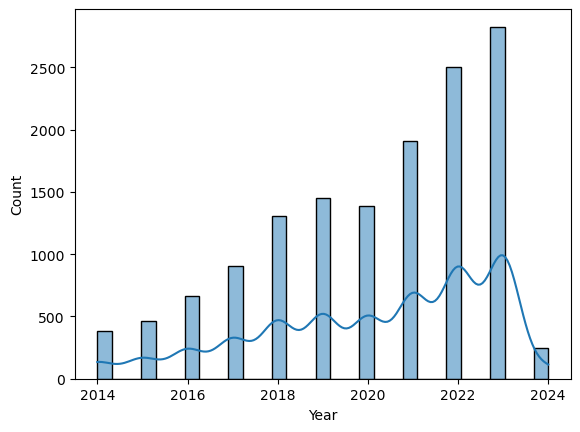

In [28]:

sns.histplot(data=non_zero_sales, x="Year",kde=True)
plt.show()

**Insights**
1. There is a good sales from year 2021 to 2023
2. Drastical decrease in sales in 2024

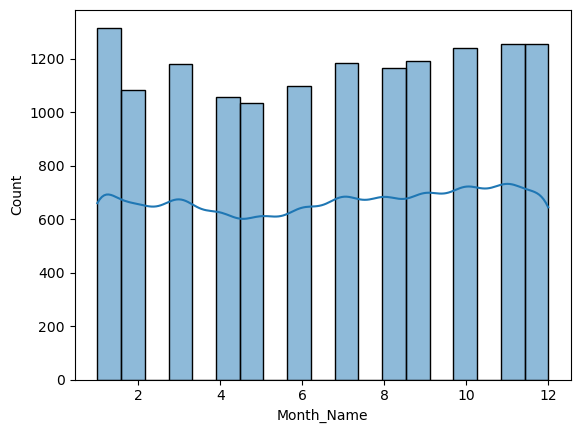

In [29]:
sns.histplot(data=non_zero_sales, x="Month_Name",kde=True)
plt.show()

**Insights**
- **Maximum sales are @ New Year time i.e January and December months.It seems customers wait for offers**

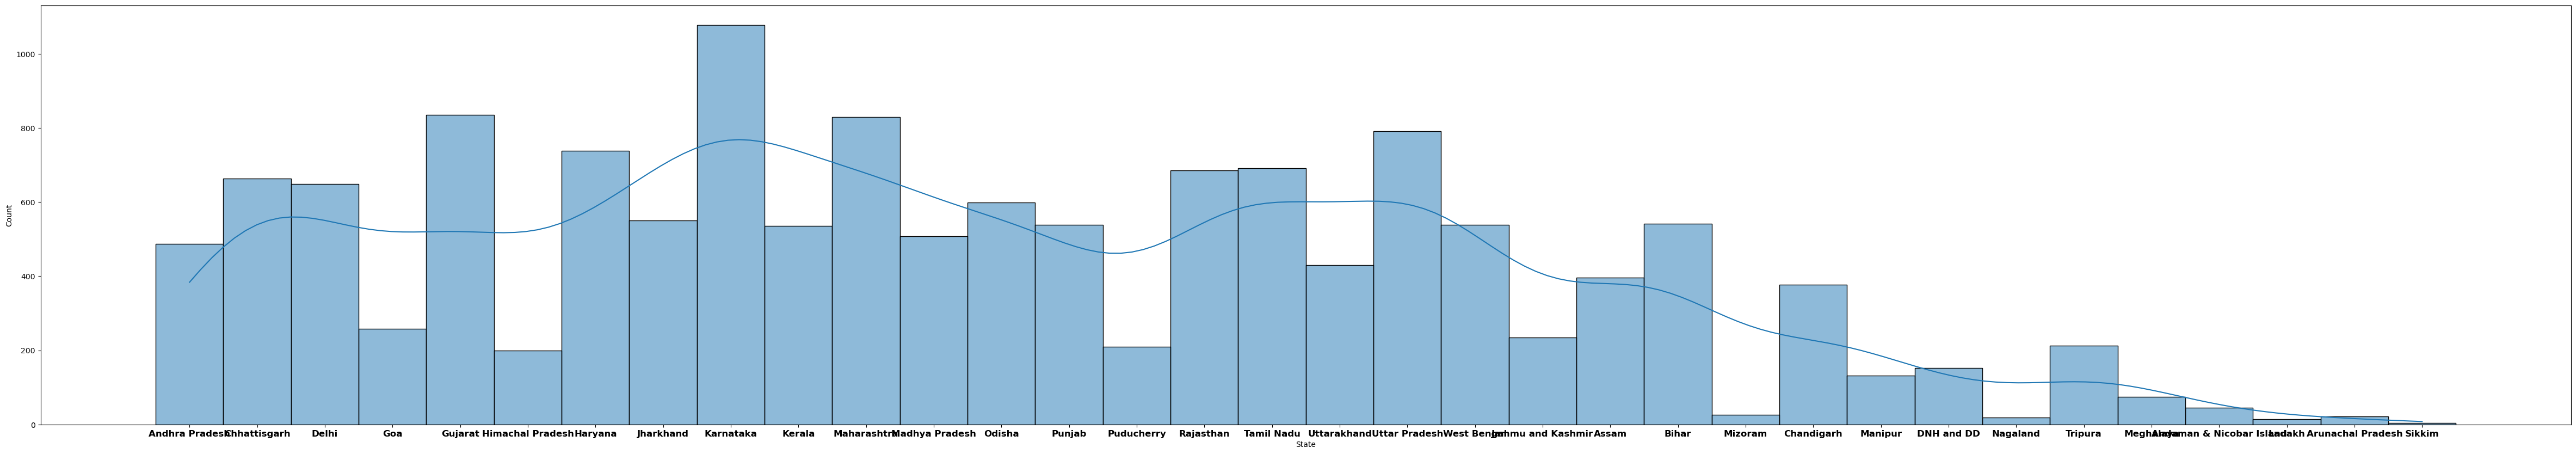

In [30]:
plt.figure(figsize=(60,10))
plt.xticks(fontweight=600,fontsize=12)
sns.histplot(data=non_zero_sales, x="State",kde=True)
plt.show()

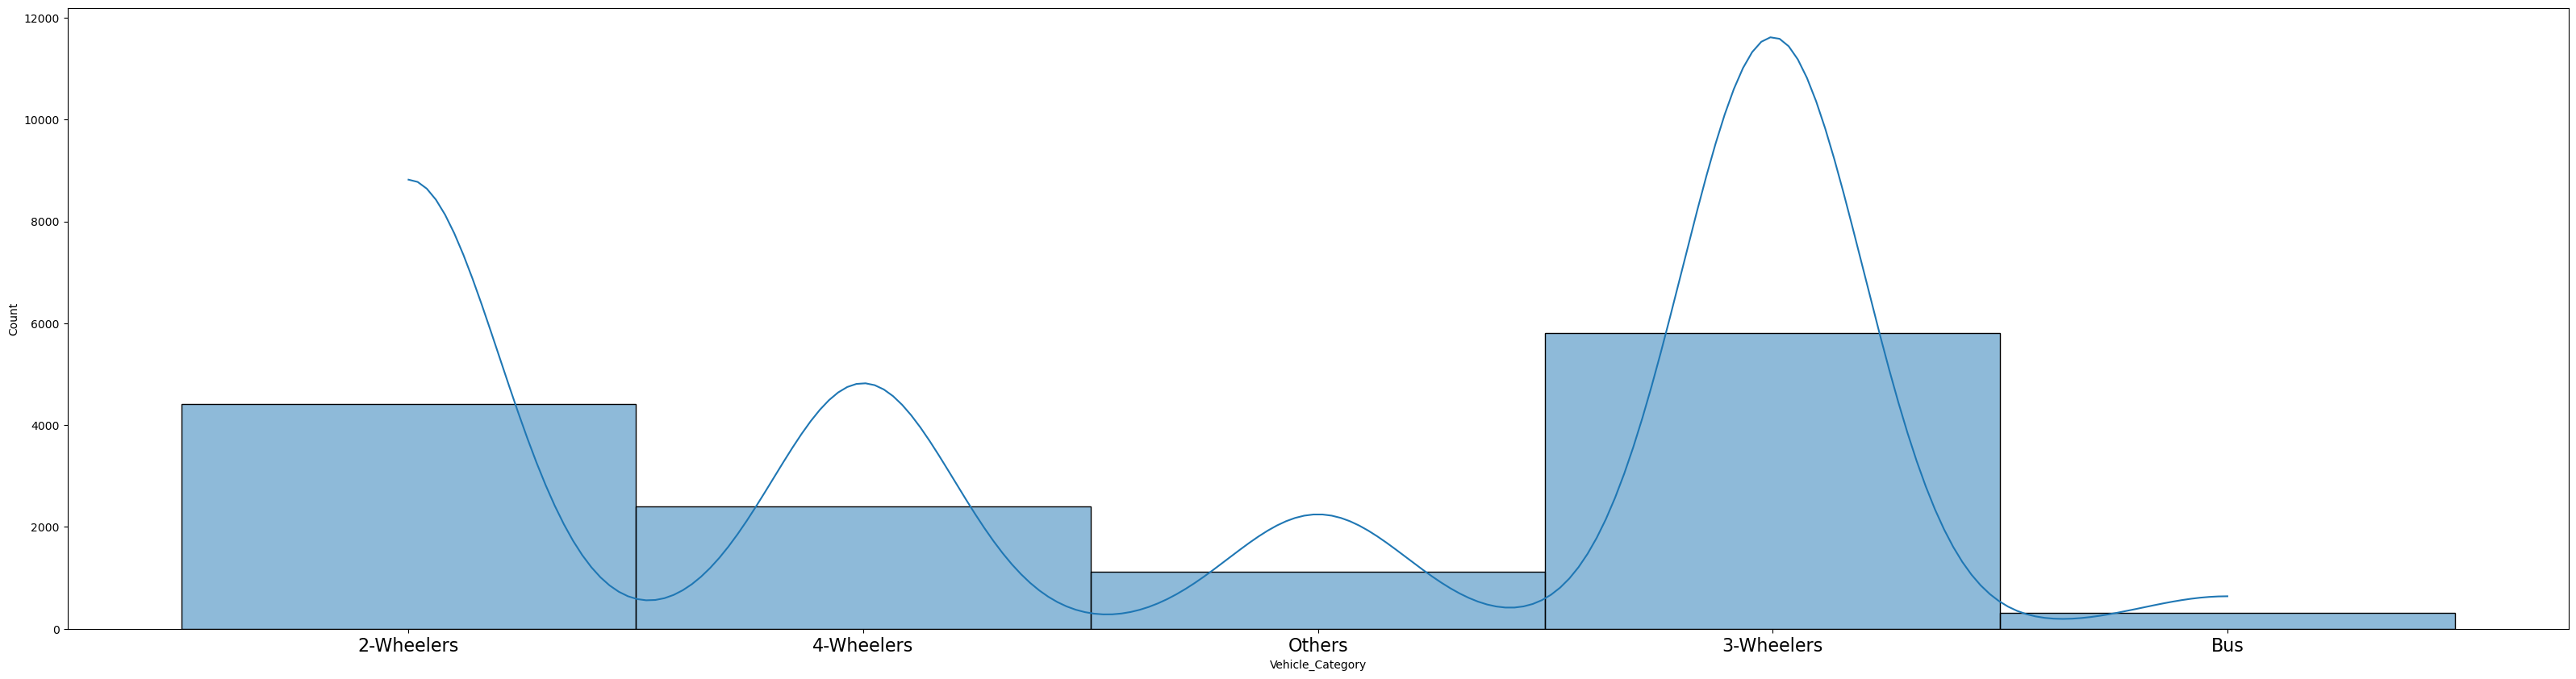

In [31]:
plt.figure(figsize=(40,10))
plt.xticks(fontsize=16)
sns.histplot(data=non_zero_sales, x="Vehicle_Category",kde=True)
plt.show()

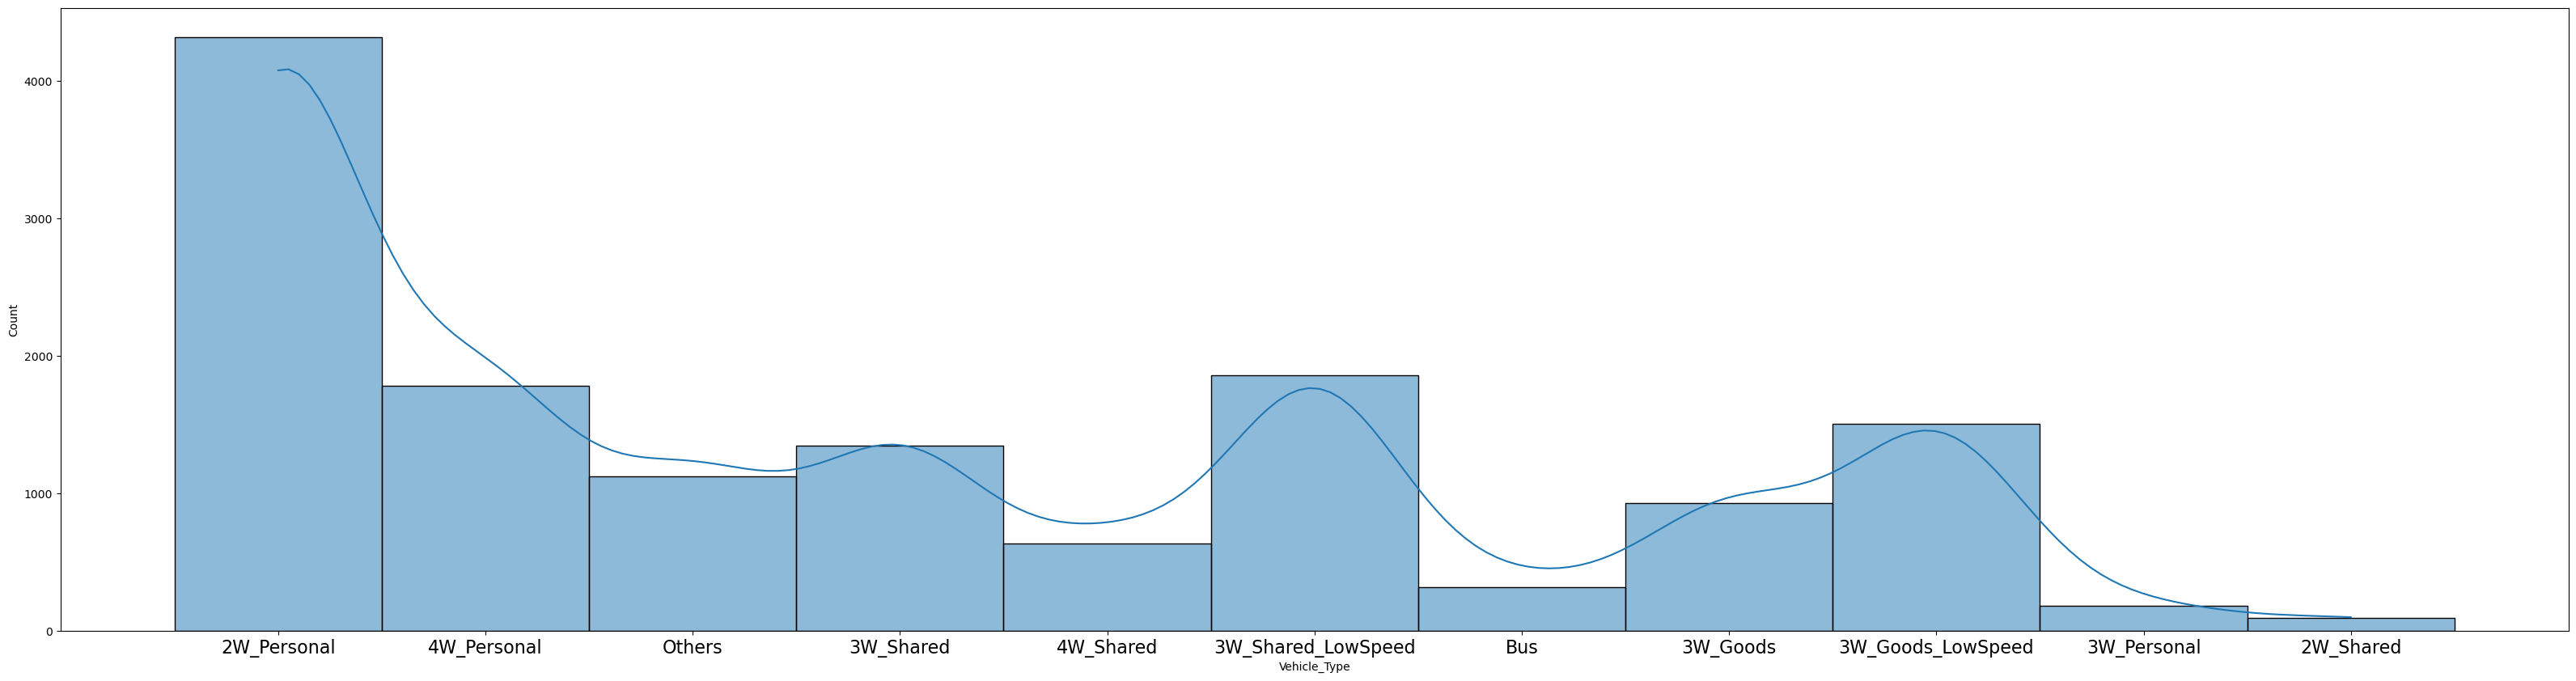

In [32]:
plt.figure(figsize=(40,10))
plt.xticks(fontsize=16)
sns.histplot(data=non_zero_sales, x="Vehicle_Type",kde=True)
plt.show()

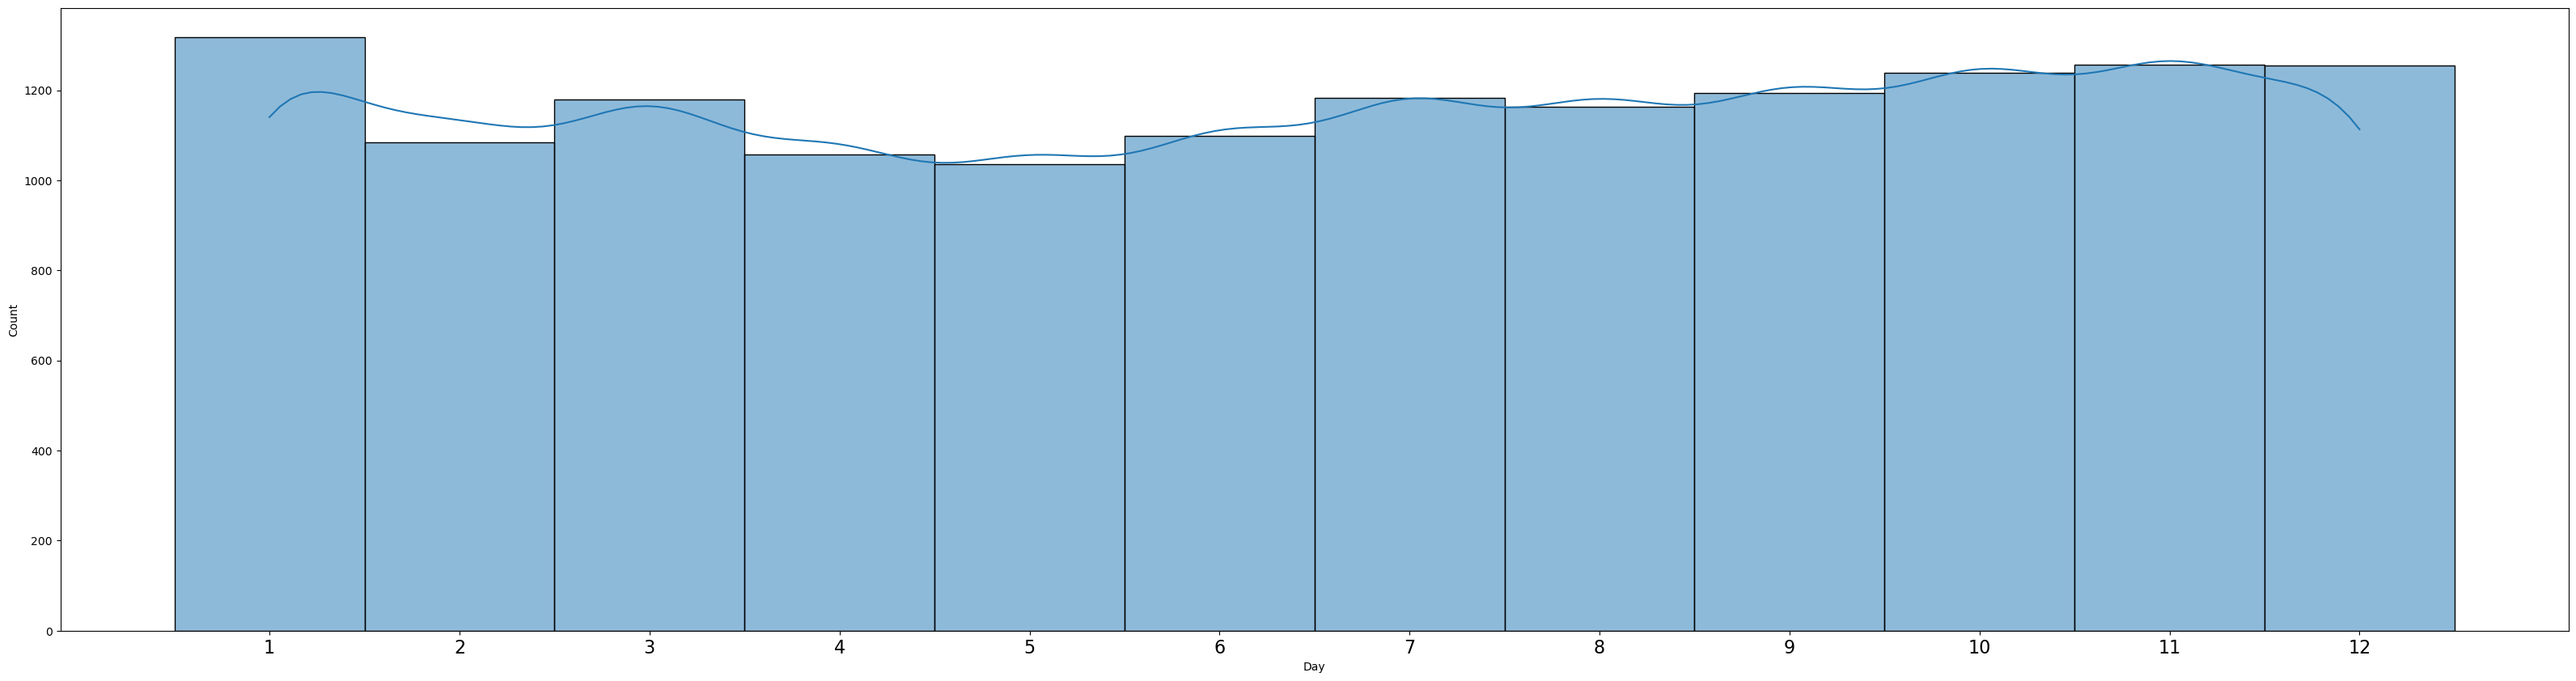

In [33]:
plt.figure(figsize=(40,10))
plt.xticks(fontsize=16)
sns.histplot(data=non_zero_sales, x="Day",kde=True)
plt.show()

### Electric_Vehicle with zeroSales

In [34]:
print(non_zero_sales['Vehicle_Type'].unique())

['2W_Personal' '4W_Personal' 'Others' '3W_Shared' '4W_Shared'
 '3W_Shared_LowSpeed' 'Bus' '3W_Goods' '3W_Goods_LowSpeed' '3W_Personal'
 '2W_Shared']


In [35]:
non_zero_sales['Vehicle_Type'].value_counts()

Vehicle_Type
2W_Personal           4314
3W_Shared_LowSpeed    1854
4W_Personal           1778
3W_Goods_LowSpeed     1501
3W_Shared             1346
Others                1122
3W_Goods               926
4W_Shared              631
Bus                    318
3W_Personal            179
2W_Shared               93
Name: count, dtype: int64

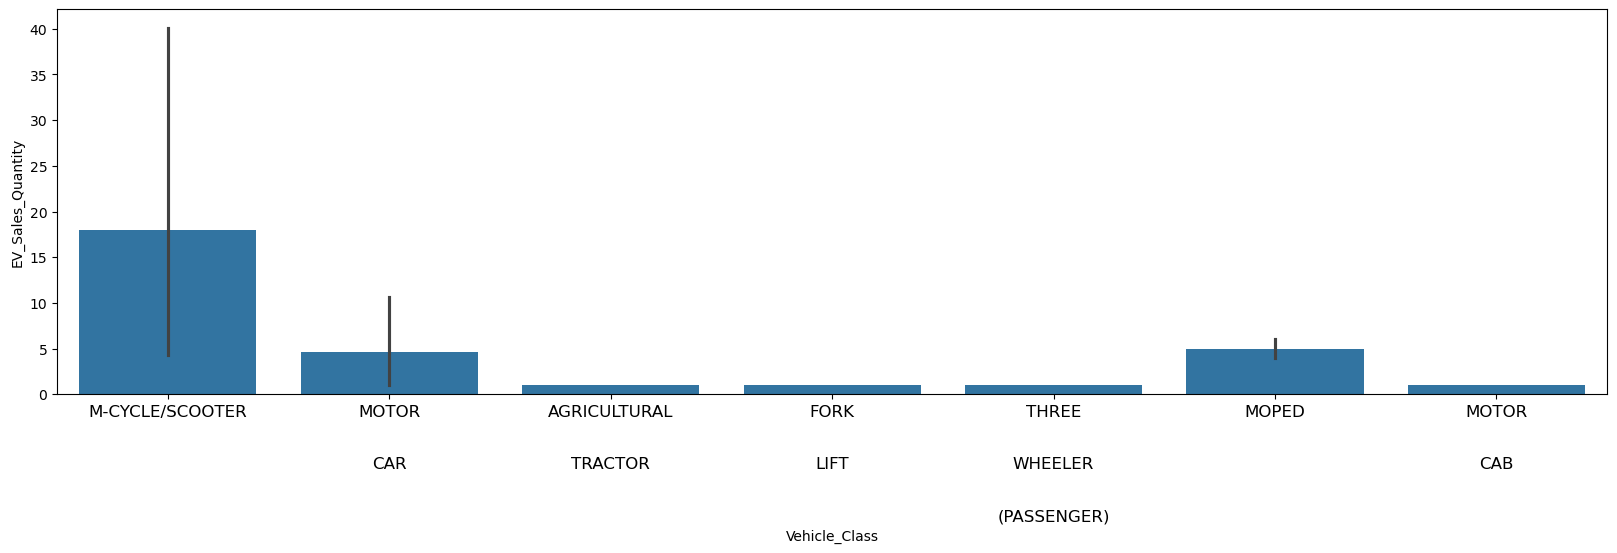

In [36]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=12,fontweight=100)
sns.barplot(x = 'Vehicle_Class', y = 'EV_Sales_Quantity', data = non_zero_sales.head(20))
plt.show()

**Maximum sales of Electric Vehicle**:
 - **M-CYCLE/SCOOTER**


**Least Sales Of Electric Vehicle**: 

 - **AGRICULTURE TRACTOR**
 - **FORKLIFT**
 - **THREE WHEELER**
 - **MOPED**
 - **MOTOR CAB**

**Suggestions**:
1. More awareness regarding electric vehicles required in agriculture areas
2. More benefits should be given to three wheelers to promote use of Battery Rickshaws
3. Electric Cabs should be available in affordable rents in apps for rental cabs
4. Need more promotion to aware people regarding benefits of Electric vehicles 

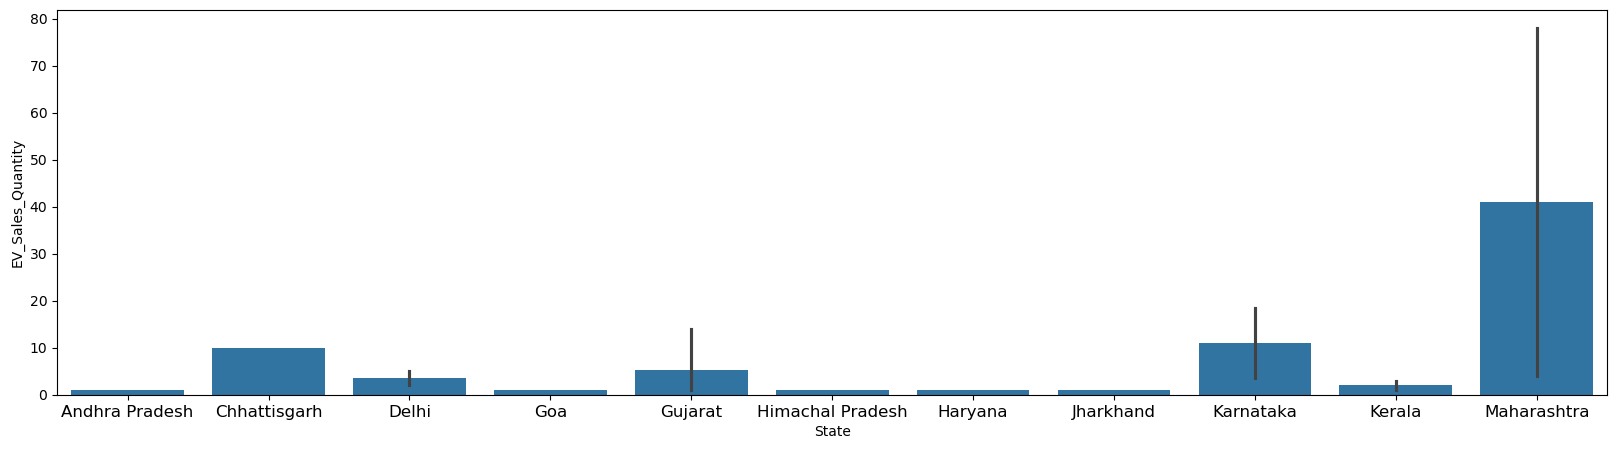

In [37]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=12,fontweight=100)
sns.barplot(x = 'State', y = 'EV_Sales_Quantity', data = non_zero_sales.head(20))
plt.show()

**Insights:**
  - **Maximum Sales Areas :**
    1. Maharashtra
  - **Least Sales Areas:**
  1. Andhra Pradesh
  2. Delhi
  3. Goa
  4. HimachalPradesh
  5. Haryana
  6. Jharkhand
  7. Kerala

 - **Neither more nor Least sales:**
  1. Chattisgarh
  2. Karnataka
  3. Gujarat
     
**Suggesstions:**
  - More Awaresness required in Least Sales Areas


In [38]:
non_zero_sales

,Year,Month_Name,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Day
13,2014,1,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1,1
102,2014,1,Chhattisgarh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,10,1
153,2014,1,Delhi,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,2,1
157,2014,1,Delhi,MOTOR\n\n\nCAR,4-Wheelers,4W_Personal,5,1
173,2014,1,Goa,MOTOR\n\n\nCAR,4-Wheelers,4W_Personal,1,1
...,...,...,...,...,...,...,...,...
96833,2023,12,Goa,THREE\n\n\nWHEELER\n\n\n(PERSONAL),3-Wheelers,3W_Personal,1,12
96837,2023,12,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,2,12
96839,2023,12,Andaman & Nicobar Island,MOTOR\n\n\nCAB,4-Wheelers,4W_Shared,1,12
96840,2023,12,Andaman & Nicobar Island,MOTOR\n\n\nCAR,4-Wheelers,4W_Personal,1,12


In [39]:
## Unique States 
print(non_zero_sales['State'].unique())

['Andhra Pradesh' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Himachal Pradesh' 'Haryana' 'Jharkhand' 'Karnataka' 'Kerala'
 'Maharashtra' 'Madhya Pradesh' 'Odisha' 'Punjab' 'Puducherry' 'Rajasthan'
 'Tamil Nadu' 'Uttarakhand' 'Uttar Pradesh' 'West Bengal'
 'Jammu and Kashmir' 'Assam' 'Bihar' 'Mizoram' 'Chandigarh' 'Manipur'
 'DNH and DD' 'Nagaland' 'Tripura' 'Meghalaya' 'Andaman & Nicobar Island'
 'Ladakh' 'Arunachal Pradesh' 'Sikkim']


In [40]:
#States Encoding
States_dictionary={'Andhra Pradesh':0,'Chhattisgarh':1,'Delhi':2,'Goa':3,'Gujarat':4,'Himachal Pradesh':5,'Madhya Pradesh':6,
                   'Odisha':7,'Punjab':8,'Puducherry':9,'Rajasthan':10,'Tamil Nadu':11,'Uttarakhand':12,'Uttar Pradesh':13,
                   'West Bengal':14,'Jammu and Kashmir':15,'Assam':16,'Bihar':17,'Mizoram':18,'Chandigarh':19,'Manipur':20,
                   'DNH and DD':21,'Nagaland':22,'Tripura':23,'Meghalaya':24,'Andaman & Nicobar Island':25,'Ladakh':26,'Arunachal Pradesh':28,'Sikkim':29,'others':100}

In [41]:
States_dictionary.keys()

dict_keys(['Andhra Pradesh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Odisha', 'Punjab', 'Puducherry', 'Rajasthan', 'Tamil Nadu', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal', 'Jammu and Kashmir', 'Assam', 'Bihar', 'Mizoram', 'Chandigarh', 'Manipur', 'DNH and DD', 'Nagaland', 'Tripura', 'Meghalaya', 'Andaman & Nicobar Island', 'Ladakh', 'Arunachal Pradesh', 'Sikkim', 'others'])

In [42]:
non_zero_sales['State']

13                 Andhra Pradesh
102                  Chhattisgarh
153                         Delhi
157                         Delhi
173                           Goa
                   ...           
96833                         Goa
96837    Andaman & Nicobar Island
96839    Andaman & Nicobar Island
96840    Andaman & Nicobar Island
96841    Andaman & Nicobar Island
Name: State, Length: 14062, dtype: object

In [43]:
non_zero_sales['State_encoded']=[States_dictionary[val] if val in States_dictionary.keys() else 100 for val in non_zero_sales['State']   ]

In [44]:
non_zero_sales.isna().sum()

Year                 0
Month_Name           0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
Day                  0
State_encoded        0
dtype: int64

In [45]:
non_zero_sales

,Year,Month_Name,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Day,State_encoded
13,2014,1,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1,1,0
102,2014,1,Chhattisgarh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,10,1,1
153,2014,1,Delhi,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,2,1,2
157,2014,1,Delhi,MOTOR\n\n\nCAR,4-Wheelers,4W_Personal,5,1,2
173,2014,1,Goa,MOTOR\n\n\nCAR,4-Wheelers,4W_Personal,1,1,3
...,...,...,...,...,...,...,...,...,...
96833,2023,12,Goa,THREE\n\n\nWHEELER\n\n\n(PERSONAL),3-Wheelers,3W_Personal,1,12,3
96837,2023,12,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,2,12,25
96839,2023,12,Andaman & Nicobar Island,MOTOR\n\n\nCAB,4-Wheelers,4W_Shared,1,12,25
96840,2023,12,Andaman & Nicobar Island,MOTOR\n\n\nCAR,4-Wheelers,4W_Personal,1,12,25


- State is encoded so now dropping state column
- **For my model i have selected two features**
- State_encoded and EV_Sales_Quantity
**Because we need to predict Sales by state in India so removing Unnecessary column**


In [46]:
non_zero_sales=non_zero_sales.drop(['State','Vehicle_Class','Vehicle_Category','Vehicle_Type','Month_Name','Year','Day'],axis=1)

In [47]:
non_zero_sales

,EV_Sales_Quantity,State_encoded
13,1,0
102,10,1
153,2,2
157,5,2
173,1,3
...,...,...
96833,1,3
96837,2,25
96839,1,25
96840,1,25


**State encoded as per state dictionary created above**

**Model_Trainer**

**Use a regression model (e.g., Random Forest Regressor) to predict EV sales.**

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [49]:
X,y=train_test_split(non_zero_sales,test_size=0.5,random_state=42)
print(X.shape)
print(y.shape)

(7031, 2)
(7031, 2)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [55]:
# Instantiate the model
model = RandomForestRegressor(n_estimators=10,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [57]:
# Make predictions
y_pred = model.predict(X_test)

In [58]:
# Evaluate the model
mse = mean_squared_error(y_test, y_test)
r2=  r2_score(y_test,y_test)

In [59]:
mse

0.0

In [60]:
r2

1.0